<a href="https://colab.research.google.com/github/vithushanms/convolutional-neural-network-demo/blob/main/%5BCNNs%5D_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras import datasets, utils

In [19]:
#using https://oreil.ly/cNbFG dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(f'shape of y_train: {y_train.shape}')
print(f'shape of x_train: {x_train.shape}')

print(f'shape of y_test: {y_test.shape}')
print(f'shape of x_test: {x_test.shape}')

shape of y_train: (50000, 1)
shape of x_train: (50000, 32, 32, 3)
shape of y_test: (10000, 1)
shape of x_test: (10000, 32, 32, 3)



The shape of x_train being (50000, 32, 32, 3) indicates that x_train is a 4-dimensional array representing the training images in the CIFAR-10 dataset.

Let's break down the dimensions:

- The first dimension (50000) represents the number of training  samples in the dataset.
- The second dimension (32) represents the height of each image in pixels.
- The third dimension (32) represents the width of each image in pixels.
- The fourth dimension (3) represents the number of color channels in each image. In this case, 3 stands for the Red, Green, and Blue (RGB) color channels.

In [23]:
#One hot encoding
NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)


In [24]:
print(f'shape of y_train: {y_train.shape}')
print(f'shape of x_train: {x_train.shape}')

print(f'shape of y_test: {y_test.shape}')
print(f'shape of x_test: {x_test.shape}')


shape of y_train: (50000, 10)
shape of x_train: (50000, 32, 32, 3)
shape of y_test: (10000, 10)
shape of x_test: (10000, 32, 32, 3)


In [29]:
#building a basic model

from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation = 'relu')(x)
output_layer = layers.Dense(units=10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)


In [31]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0005) #using Adam (Adaptive Moment Estimation) instead of gradient decent
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

Adam vs Gradient Decent

- Adaptive Learning Rate: Adam dynamically adjusts the learning rate for each parameter based on its previous gradients. This adaptive behavior helps to handle different parameter scales and varying learning rates, making it less sensitive to the initial learning rate selection.

- Momentum: Adam incorporates momentum, which helps to accelerate the convergence by accumulating past gradients. It allows the algorithm to overcome areas with small or noisy gradients and to traverse flat regions more effectively.

- Efficient Memory Usage: Adam maintains an exponentially decaying average of past gradients and squared gradients. This memory-efficient feature allows it to store and use a limited history of gradients, making it well-suited for large-scale models with millions of parameters.

- Robustness to Sparse Gradients: Adam performs well even in scenarios where gradients are sparse or noisy. The adaptive learning rate and momentum components help overcome the challenges associated with sparse gradients, leading to better convergence.

In [32]:
model.fit(x_train
          , y_train
          , batch_size = 32
          , epochs = 10
          , shuffle = True
          )

Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 1.8491 - accuracy: 0.3319
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6623 - accuracy: 0.4049
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5911 - accuracy: 0.4309
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5361 - accuracy: 0.4537
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4978 - accuracy: 0.4674
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4641 - accuracy: 0.4784
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4358 - accuracy: 0.4893
Epoch 8/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4129 - accuracy: 0.4982
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3944 - accuracy: 0.5060
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4553 - accuracy: 0.4805


[1.4553073644638062, 0.4805000126361847]

In [35]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 3ms/step


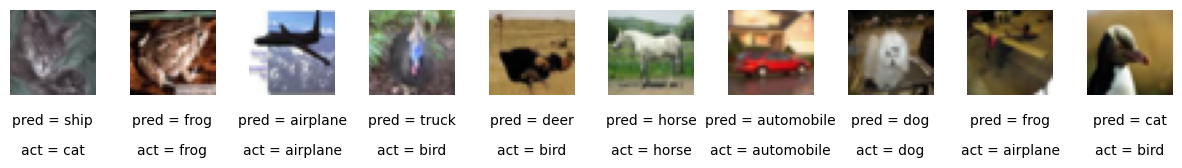

In [36]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)